#### In this notebook, we will explore the time-based split of the train and test data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

events = pd.read_csv('../data/events.csv', dtype=np.int32, index_col=0, usecols=[0,3])
events.head()

,timestamp
display_id,
1,61
2,81
3,182
4,234
5,338


Timestamps are in milliseconds since 1970-01-01 - 1465876799998, so time zero approximately corresponds to 04:00 UTC, 14th June 2016. I'm not going to do any correction for timezones, but it's worth pointing out that this corresponds to 00:00 Eastern Daylight Time.

In [8]:
train = pd.merge(pd.read_csv('../data/clicks_train.csv', dtype=np.int32, index_col=0).sample(frac=0.1),
                events, left_index=True, right_index=True)
test = pd.merge(pd.read_csv('../data/clicks_test.csv', dtype=np.int32, index_col=0).sample(frac=0.1),
                events, left_index=True, right_index=True)

In [22]:
from __future__ import division
test['hour'] = (test.timestamp // (3600 * 1000)) % 24
test['day'] = test.timestamp // (3600 * 24 * 1000) 

train['hour'] = (train.timestamp // (3600 * 1000)) % 24
train['day'] = train.timestamp // (3600 * 24 * 1000)

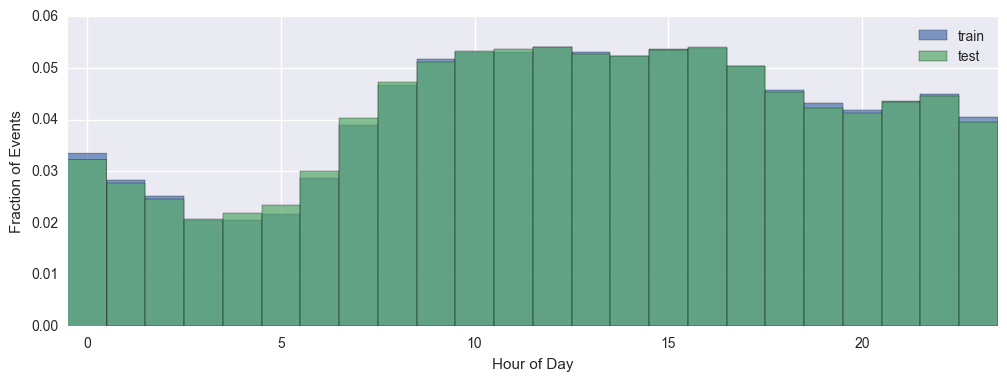

In [23]:
plt.figure(figsize=(12,4))
train.hour.hist(bins=np.linspace(-0.5, 23.5, 25), label='train', alpha=0.7, normed=True)
test.hour.hist(bins=np.linspace(-0.5, 23.5, 25), label='test', alpha=0.7, normed=True)
plt.xlim(-0.5,23.5)
plt.legend(loc="best")
plt.xlabel("Hour of Day")
plt.ylabel("Fraction of Events")

The time-distribution of clicks appears consistent with the majority of the dataset being in UTC-4 to UTC-6. There appears to be a slight shift from train to test.

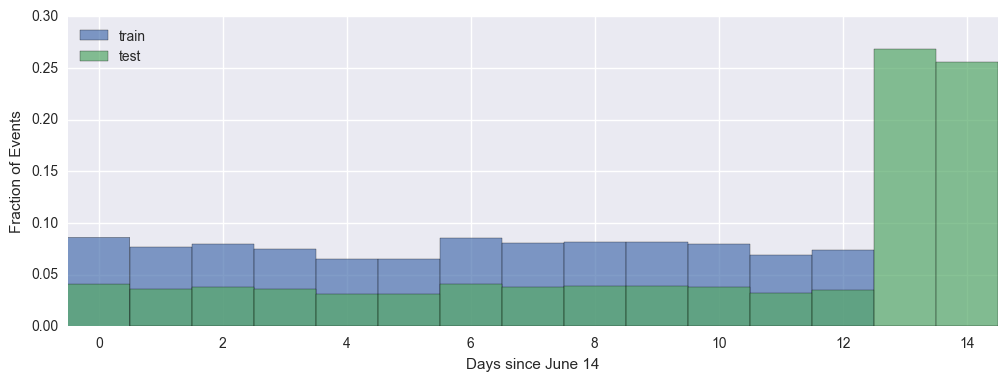

In [24]:
plt.figure(figsize=(12,4))
train.day.hist(bins=np.linspace(-.5, 14.5, 16), label="train", alpha=0.7, normed=True)
test.day.hist(bins=np.linspace(-.5, 14.5, 16), label="test", alpha=0.7, normed=True)
plt.xlim(-0.5, 14.5)
plt.legend(loc="best")
plt.xlabel("Days since June 14")
plt.ylabel("Fraction of Events")

Now we can see the very interesting time-based train/test split. About half of the test data is sampled from the same time as the train set, with another half sampled from the two days immediately following.

Next for a more detailed look at the distribution of the training data. Note again that no timezone correction has been applied, but 80% of the data are from the US.

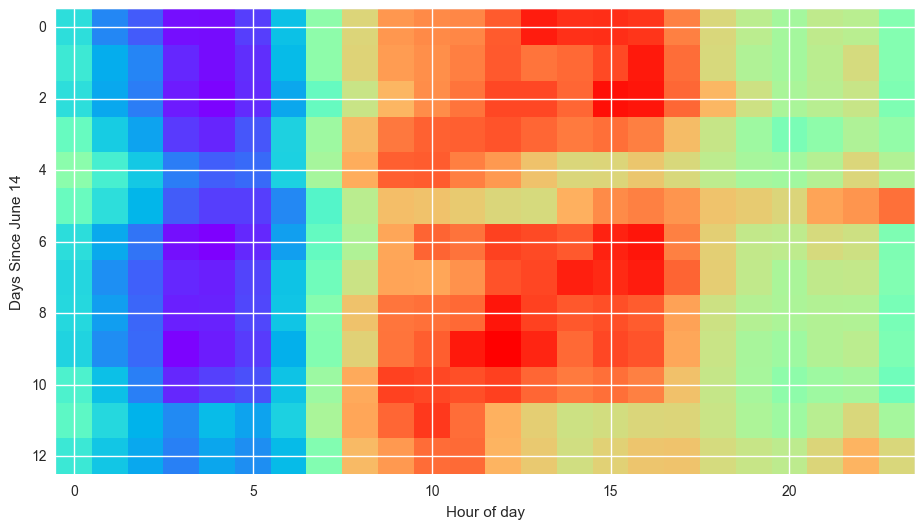

In [27]:
plt.figure(figsize=(12,6))
hour_day_counts = train.groupby(["hour", "day"]).count().ad_id.values.reshape(24,-1)

# plot 2d hist in days and hours, with each day normalised to 1
plt.imshow((hour_day_counts/hour_day_counts.sum(axis=0)).T,
          interpolation="none", cmap="rainbow")
plt.xlabel('Hour of day')
plt.ylabel('Days Since June 14')

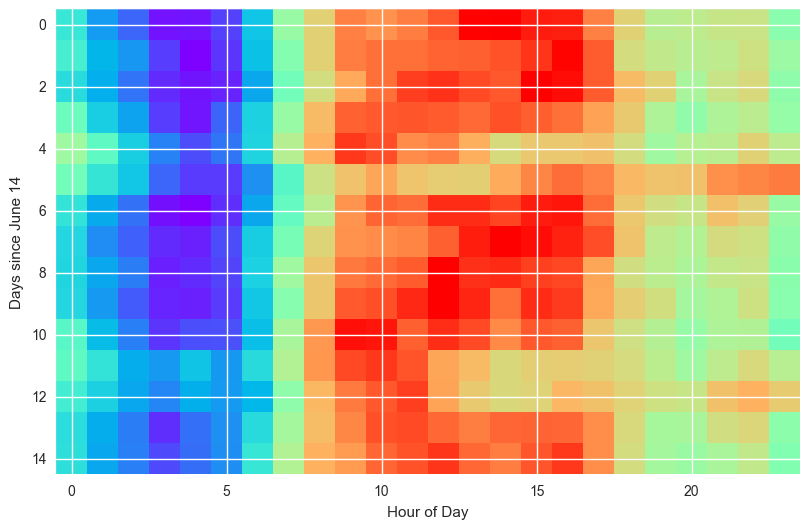

In [28]:
# for completeness, the test set too:
plt.figure(figsize=(12,6))
hour_day_counts = test.groupby(["hour", "day"]).count().ad_id.values.reshape(24,-1)
# plot 2d hist in days and hours, with each day normalised to 1 
plt.imshow((hour_day_counts / hour_day_counts.sum(axis=0)).T,
           interpolation="none", cmap="rainbow")
plt.xlabel("Hour of Day")
plt.ylabel("Days since June 14")

Looks like the test set has the same distribution as the training set